<a href="https://colab.research.google.com/github/mioyn/AdvDataProg/blob/main/Transformers_Text_Classification%20examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install transformers

In [ ]:
from transformers import pipeline

import requests

from bs4 import BeautifulSoup

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize


# Step 1: Set up the classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

#classifier = pipeline("zero-shot-classification", model="MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli")

# Step 2: Fetch and parse website content
url = "https://brokenchalk.org/housing-challenges-for-international-students-in-the-netherlands-in-comparison-to-dutch-students/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Step 3: Extract main text content
paragraphs = soup.find_all("p")
text = " ".join([p.get_text() for p in paragraphs if p.get_text().strip()])

# Step 4: Split into sentences
sentences = sent_tokenize(text)
print(sentences)
# Step 5: Define categories
categories = [
    "Housing Scarcity",
    "Discrimination",
    "Scams and Fraud",
    "Cultural Barriers",
    "Social Exclusion",
    "Policy Response",
    "Student Vulnerability"
]

results= []
# Step 6: Run classification
for sentence in sentences:
    if sentence.strip():
        result = classifier(sentence, candidate_labels=categories)
        results.append((sentence, result['labels'][0], result['scores'][0]))

# Step 7: Print results
for sentence, label, confidence in results:
        top_label = result['labels'][0]
        confidence = result['scores'][0]
        print(f"Text: {sentence.strip()}")
        print(f"Predicted Category: {top_label} (Confidence: {confidence:.2f})\n")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
Device set to use cpu


['The Netherlands has major challenges in the housing market, mainly because of scarcity.', 'Finding affordable and decent accommodation can be a struggle, especially when not native to the language or common from a different country.', 'International students are particularly vulnerable because of the discrimination and exploitation they face in the current housing market.', 'The Problem:\xa0 The main issue is the severe shortage of suitable housing options, especially for (international) students.', 'Exploitation and deception are commonly faced when international students try to find a suitable housing situation.', 'Various sources explain why internationals are more vulnerable than Dutch students:\xa0 Unveiling Scammer Tactics:\xa0 Scammers take advantage of the housing crisis, employing various (although often similar) tactics to deceive potential renters:\xa0 Awareness of these tactics empowers renters to take precautionary measures against scams and safeguard themselves effectiv

In [ ]:
import plotly.express as px
from collections import Counter

# Step 1: Count predictions
predicted_categories = [label for _, label, _ in results]
category_counts = Counter(predicted_categories)
# Prepare data
category_data = {"Category": list(category_counts.keys()), "Frequency": list(category_counts.values())}

# Create bar chart
fig = px.bar(category_data, x="Category", y="Frequency", title="Interactive Category Distribution",
             labels={"Frequency": "Number of Sentences"}, color="Category")
fig.update_layout(xaxis_tickangle=-45)
fig.show()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/91.3M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/436 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


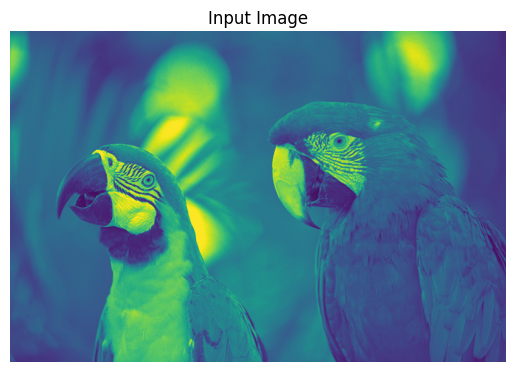

Classification Results:
macaw: 0.9978
sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita: 0.0017
lorikeet: 0.0002
African grey, African gray, Psittacus erithacus: 0.0001
quail: 0.0001


In [ ]:
from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt
import requests

# Set up the image classification pipeline
classifier = pipeline(task="image-classification", model="facebook/dinov2-small-imagenet1k-1-layer")

# Load an image from a URL (you can also use a local path)
url = "https://huggingface.co/datasets/Narsil/image_dummy/raw/main/parrots.png"
image = Image.open(requests.get(url, stream=True).raw)

# Run classification
results = classifier(image)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.title("Input Image")
plt.show()

# Display classification results
print("Classification Results:")
for result in results:
    label = result['label']
    score = result['score']
    print(f"{label}: {score:.4f}")

Device set to use cpu


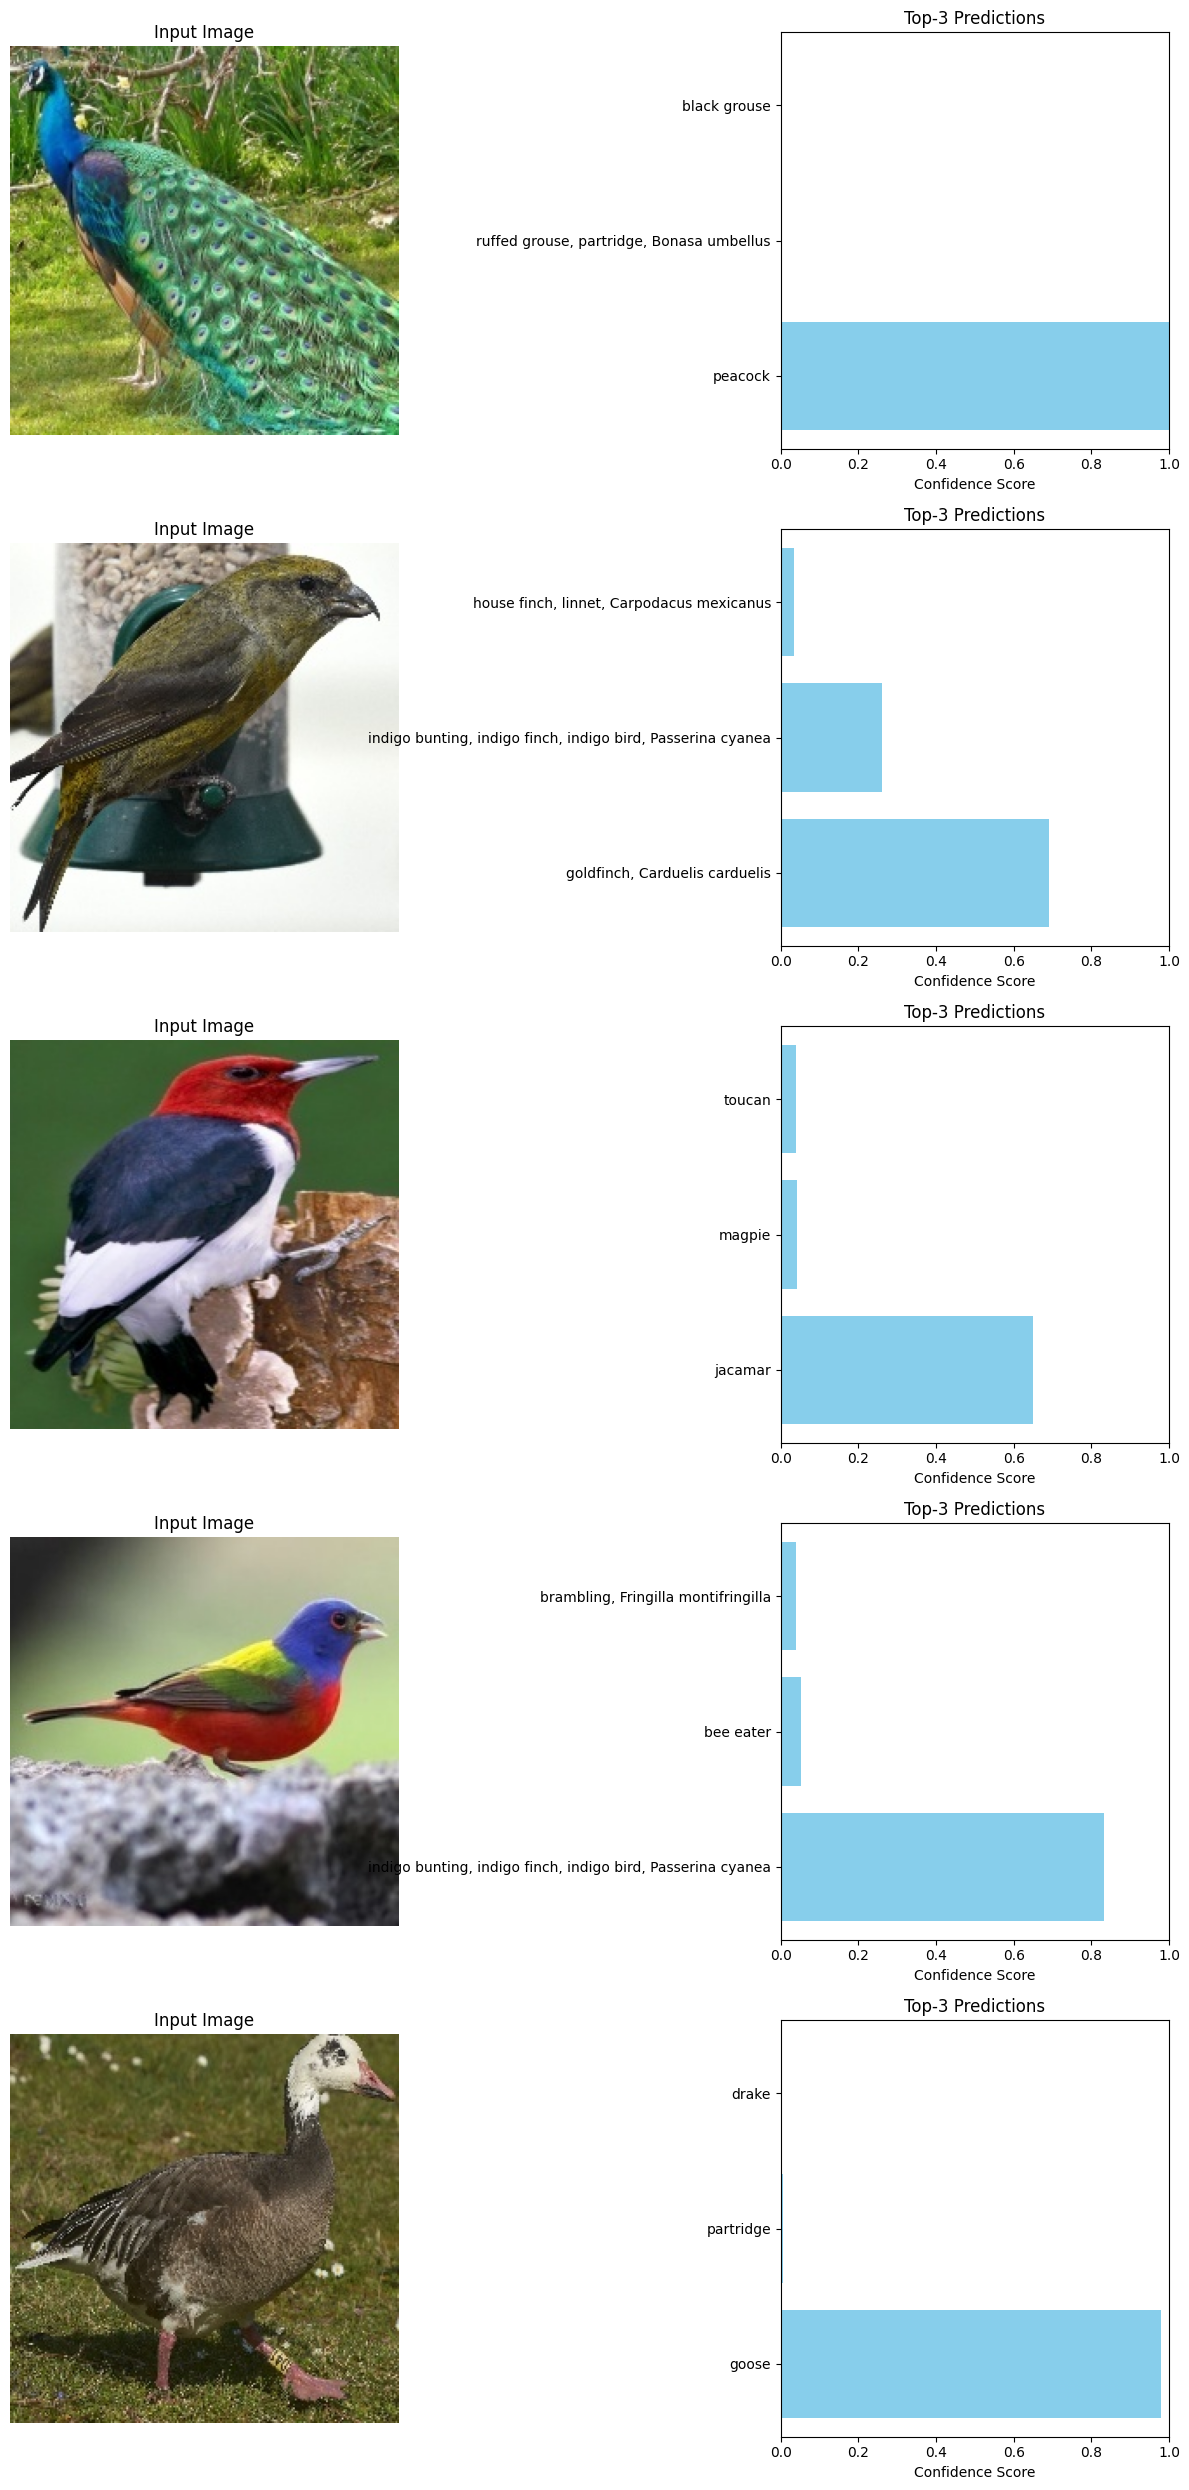

<Figure size 640x480 with 0 Axes>

In [ ]:
from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt
import requests
import numpy as np

# Step 1: Initialize the classifier pipeline
classifier = pipeline(task="image-classification", model="facebook/dinov2-small-imagenet1k-1-layer")

# Step 2: Provide list of image URLs (or local paths)
image_urls = [
    '/content/1.jpg',
    '/content/2.jpg',
    '/content/3.jpg',
    '/content/4.jpg',
    '/content/5.jpg'
]

# Step 3: Load images and classify
images = []
results = []
for url in image_urls:
    img = Image.open(url)
    images.append(img)
    result = classifier(img, top_k=3)
    results.append(result)

# Visualization: each image + horizontal bar chart of confidences
fig, axes = plt.subplots(len(images), 2, figsize=(12, 5 * len(images)))

for idx, (img, preds) in enumerate(zip(images, results)):
    # Image on the left
    axes[idx, 0].imshow(img)
    axes[idx, 0].axis('off')
    axes[idx, 0].set_title("Input Image")

    # Bar chart on the right
    labels = [p['label'] for p in preds]
    scores = [p['score'] for p in preds]

    y_pos = np.arange(len(labels))[::-1]  # to reverse order, top label on top
    axes[idx, 1].barh(y_pos, scores, color='skyblue')
    axes[idx, 1].set_yticks(y_pos)
    axes[idx, 1].set_yticklabels(labels)
    axes[idx, 1].invert_yaxis()
    axes[idx, 1].set_xlim(0, 1)
    axes[idx, 1].set_xlabel("Confidence Score")
    axes[idx, 1].set_title("Top-3 Predictions")

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

normalizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

Device set to use cpu


Processing /content/260-123286-0010.flac...


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:604: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Using custom `forced_decoder_ids` from the (generation) config. This is deprecated in favor of the `task` and `language` flags/config options.
Transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English. This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`. See https://github.com/huggingface/transformers/pull/28687 for more details.


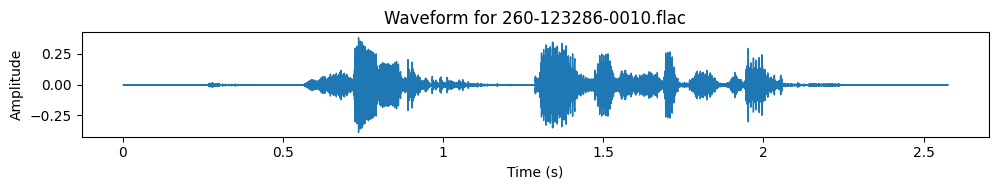

Transcript:
 Sunday, August 16th.


📜 All Transcripts:
/content/260-123286-0010.flac:  Sunday, August 16th.


In [10]:
import os
import librosa
import matplotlib.pyplot as plt
from transformers import pipeline

# Initialize Whisper pipeline
asr = pipeline(task="automatic-speech-recognition", model="openai/whisper-large-v3")

# List of audio file paths
audio_files = ["/content/260-123286-0010.flac"]

# Store results
transcripts = {}

# Loop through audio files
for file in audio_files:
    print(f"Processing {file}...")
    result = asr(file)
    transcripts[file] = result["text"]

    # Load audio for visualization
    y, sr = librosa.load(file, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)

    # Plot waveform
    plt.figure(figsize=(10, 2))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform for {os.path.basename(file)}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

    # Optionally print the transcript
    print(f"Transcript:\n{result['text']}\n")

# Optionally print all transcripts
print("\n📜 All Transcripts:")
for k, v in transcripts.items():
    print(f"{k}: {v}")
